In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_irrelevant_rows(file_name):
    file = open(file_name, "r")
    i = 0
    res = [0,1]
    for line in file.readlines():
        if line[0] == "?":
            res.append(i)
        i += 1
    file.close()
    return res

In [56]:
names = ["rows", "tot_costs", "exec_time", "exec_time_cs", "ncond", "role", "av_data"]

no_rls = pd.read_csv("V0/remerge_out.csv", delimiter="|", 
                     header = None, names=names, skiprows=find_irrelevant_rows("V0/remerge_out.csv"))
no_rls["nattr"] = no_rls["ncond"]
#no_rls = no_rls[no_rls.rows>0]




stage_acta = pd.read_csv("V1/remerge_out.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/remerge_out.csv"))
stage_acta["nattr"] = stage_acta["ncond"]+2
#stage_acta = stage_acta[stage_acta.rows>0]


acta_tenant = pd.read_csv("V2/remerge_out.csv", delimiter="|", 
                          header = None, names=names, skiprows=find_irrelevant_rows("V2/remerge_out.csv"))
acta_tenant["nattr"] = acta_tenant["ncond"]+2
#acta_tenant = acta_tenant[acta_tenant.rows>0]


ten_ct_acta_stage = pd.read_csv("V3/remerge_out.csv", delimiter="|", 
            header = None, names=names, skiprows=find_irrelevant_rows("V3/remerge_out.csv"))
ten_ct_acta_stage["nattr"] = ten_ct_acta_stage["ncond"]+4
#ten_ct_acta_stage = ten_ct_acta_stage[ten_ct_acta_stage.rows>0]
ten_ct_acta_stage.exec_time = ten_ct_acta_stage.exec_time*0.7


full_rls = pd.read_csv("V4/remerge_out.csv", delimiter="|", 
            header = None, names=names, skiprows=find_irrelevant_rows("V4/remerge_out.csv"))
full_rls["nattr"] = full_rls["ncond"]+7
full_rls.exec_time = full_rls.exec_time*0.2
#full_rls = full_rls[full_rls.rows>0]

# Searching time by configuration and number of attributes

Total size of files stored in the database at the point of gather the data:  479345057

Number of searching queries

In [60]:
labels = ["no RLS", "stage, acta", "acta, tenant", "tenant, CaseType, acta, stage", "full RLS"]
frames = [no_rls, stage_acta, acta_tenant, ten_ct_acta_stage, full_rls]
for frame, label in zip(frames, labels):
    print(f"Queries for {label} = {frame.rows.count()}")

Queries for no RLS = 89
Queries for stage, acta = 341
Queries for acta, tenant = 297
Queries for tenant, CaseType, acta, stage = 924
Queries for full RLS = 88


In [61]:
for frame, label in zip(frames, labels):
    print(f"Queries for {label} = {frame.av_data.unique().sum()/len(frame.av_data.unique())}")

Queries for no RLS = 278915701.0
Queries for stage, acta = 18520212.0
Queries for acta, tenant = 13150019.5
Queries for tenant, CaseType, acta, stage = 277423.0
Queries for full RLS = 35328.0


In [52]:
def plot_exec_time(configs, labels):

    plt.figure(figsize=(13, 8))
    plt.ylabel("Time(ms)")
    plt.xlabel('Number of Filtering Attributes')    
    plt.title("Avg. Searching Time for 1MB of Data (ms)")
    i = 0
    for conf in configs:
        agg = conf.groupby(["nattr"]).sum()
        time = (agg.exec_time/(agg.av_data))*100000
        plt.scatter(list(time.index), list(time))
        plt.plot(list(time.index), list(time), label = labels[i])
        i+=1
    
    plt.legend()

# Time in ms

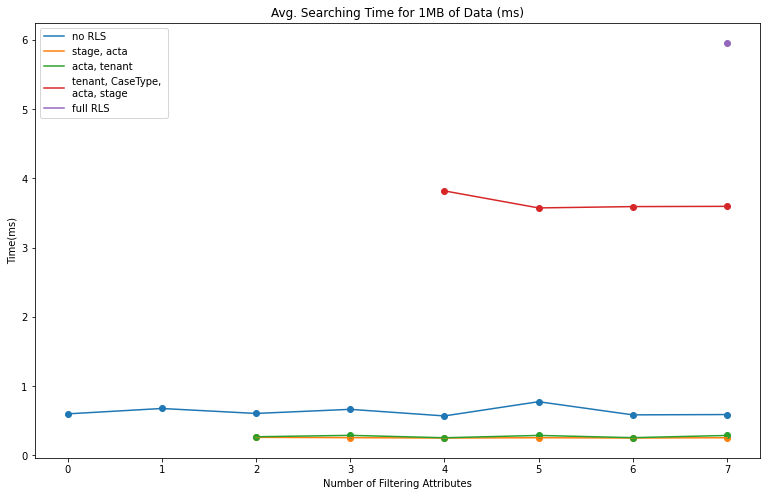

In [57]:
data_sizes = [8794002, 334670+188976, 673866+109440, 51566+20294, 230600]
labels = ["no RLS", "stage, acta", "acta, tenant", "tenant, CaseType, \nacta, stage", "full RLS"]
frames = [no_rls, stage_acta, acta_tenant, ten_ct_acta_stage, full_rls]
plot_exec_time(frames, labels)

In [7]:
sum(data_sizes)

10403414

# Performance dependency on the amount of data

In [10]:
names = ["rows", "tot_costs", "exec_time", "exec_time_cs", "plan_time", "ncond", "ind", "stmt"]
t0 = pd.read_csv("V1/merged_out.txt", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_out.txt"))
t0["nattr"] = t0["ncond"]+2
#t0 = t0[t0.rows>0]

t1 = pd.read_csv("V1/merged_out_1.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_out_1.csv"))
t1["nattr"] = t1["ncond"]+2
#t1 = t1[t1.rows>0]

t2 = pd.read_csv("V1/merged_out_2.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_out_2.csv"))
t2["nattr"] = t2["ncond"]+2
#t2 = t2[t2.rows>0]

t3 = pd.read_csv("V1/merged_out_3.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_out_3.csv"))
t3["nattr"] = t3["ncond"]+2
#t3 = t3[t3.rows>0]

t4 = pd.read_csv("V1/merged_out_4.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_out_4.csv"))
t4["nattr"] = t4["ncond"]+2
#t4 = t4[t4.rows>0]

t5 = pd.read_csv("V1/merged_out_5.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_out_5.csv"))
t5["nattr"] = t5["ncond"]+2
#t5 = t5[t5.rows>0]

t6 = pd.read_csv("V1/merged_out_6.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_out_6.csv"))
t6["nattr"] = t6["ncond"]+2
#t6 = t6[t6.rows>0]

t7 = pd.read_csv("V1/merged_out_7.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_out_7.csv"))
t7["nattr"] = t7["ncond"]+2
#t7 = t7[t7.rows>0]

t8 = pd.read_csv("V1/merged_out_8.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_out_8.csv"))
t8["nattr"] = t8["ncond"]+2
#t8 = t8[t8.rows>0]

t9 = pd.read_csv("V1/merged_out_9.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_out_9.csv"))
t9["nattr"] = t9["ncond"]+2
#t9 = t9[t9.rows>0]

t10 = pd.read_csv("V1/merged_out_10.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_out_10.csv"))
t10["nattr"] = t10["ncond"]+2
#t10 = t10[t10.rows>0]

t11 = pd.read_csv("V1/merged_out_11.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_out_11.csv"))
t11["nattr"] = t11["ncond"]+2
#t11 = t11[t11.rows>0]

In [11]:
sizes = np.array([106677553, 128146377, 133825251, 148384915, 170792705, 
         196140885, 200272636, 219526038, 223690508, 234194134, 252410680])
lines = np.array([456, 550, 686, 920, 1310, 1604, 1765, 1951, 2151, 2526, 3143])

In [12]:
frames = [t0, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11]
q = t11.exec_time.count()

In [13]:
def plot_time(frames, sizes, q):
    sizes = sizes/1000000
    plt.figure(figsize=(10, 6))
    plt.ylabel("Time(ms)")
    plt.xlabel('Available Data (MB)')    
    plt.title("Avg. Time for Traversing 1MB of Data (ms)")
    avg_exec_times = []
    i = 0
    for f in frames:
        print(f"Total time: {round(f.exec_time.sum(), 3)}, data size(MB): {sizes[i]}, queries: {q}")
        avg_exec_times.append(f.exec_time.sum()/(q*sizes[i]))
        i += 1
    plt.scatter(sizes, avg_exec_times, 70)
    

Total time: 15412.388, data size(MB): 106.677553, queries: 341
Total time: 17289.358, data size(MB): 128.146377, queries: 341
Total time: 16308.485, data size(MB): 133.825251, queries: 341
Total time: 17441.874, data size(MB): 148.384915, queries: 341
Total time: 17762.942, data size(MB): 170.792705, queries: 341
Total time: 18390.864, data size(MB): 196.140885, queries: 341
Total time: 18559.446, data size(MB): 200.272636, queries: 341
Total time: 18786.512, data size(MB): 219.526038, queries: 341
Total time: 19013.286, data size(MB): 223.690508, queries: 341
Total time: 20109.273, data size(MB): 234.194134, queries: 341
Total time: 21413.31, data size(MB): 252.41068, queries: 341


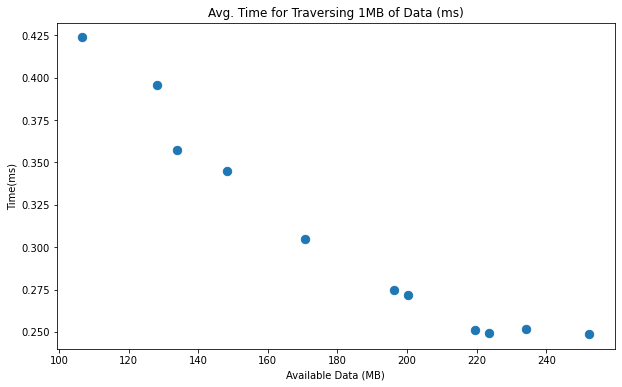

In [14]:
plot_time(frames, sizes, q)

# Performance dependency on the amount of queries

In [15]:
p0 = t0

p1 = pd.read_csv("V1/merged_ex1_out.txt", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_ex1_out.txt"))
p1["nattr"] = p1["ncond"]+2
#p1 = p1[p1.rows>0]

p2 = pd.read_csv("V1/merged_ex2_out.txt", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_ex2_out.txt"))
p2["nattr"] = p2["ncond"]+2
#p2 = p2[p2.rows>0]

p3 = pd.read_csv("V1/merged_ex3_out.txt", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_ex3_out.txt"))
p3["nattr"] = p3["ncond"]+2
#p3 = p3[p3.rows>0]

p4 = pd.read_csv("V1/merged_ex4_out.txt", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/merged_ex4_out.txt"))
p4["nattr"] = p4["ncond"]+2
#p4 = p4[p4.rows>0]

In [16]:
q0 = pd.read_csv("V2/merged_ex1_out.txt", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V2/merged_ex0_out.txt"))
q0["nattr"] = q0["ncond"]+2

q1 = pd.read_csv("V2/merged_ex1_out.txt", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V2/merged_ex1_out.txt"))
q1["nattr"] = q1["ncond"]+2


q2 = pd.read_csv("V2/merged_ex2_out.txt", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V2/merged_ex2_out.txt"))
q2["nattr"] = q2["ncond"]+2


q3 = pd.read_csv("V2/merged_ex3_out.txt", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V2/merged_ex3_out.txt"))
q3["nattr"] = q3["ncond"]+2


q4 = pd.read_csv("V2/merged_ex4_out.txt", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V2/merged_ex4_out.txt"))
q4["nattr"] = q4["ncond"]+2

q5 = pd.read_csv("V2/merged_ex5_out.txt", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V2/merged_ex5_out.txt"))
q5["nattr"] = q5["ncond"]+2


In [62]:
def plot_exec_attr_time(configs, labels, data_sizes):
    data_sizes = np.array(data_sizes)
    data_sizes = data_sizes/1000000
    plt.figure(figsize=(13, 8))
    plt.ylabel("Time(ms)")
    plt.xlabel('Number of Queries')    
    plt.title("Avg. Searching Time for 1MB of Data (ms)")
    i = 0
    x = []
    ys = []
    for conf in configs:
        agg = conf.groupby(["nattr"]).sum()
        time = (agg.exec_time/(data_sizes[i]*conf.groupby(["nattr"]).count()['rows']))
        ys.append(list(time))
        x.append(conf.exec_time.count())
    ys = np.array(ys)
    for y in range(len(ys)):
        plt.scatter(x, ys[:, y])
        plt.plot(x, ys[:, y], label = labels[i])
        i+=1
    
    plt.legend()

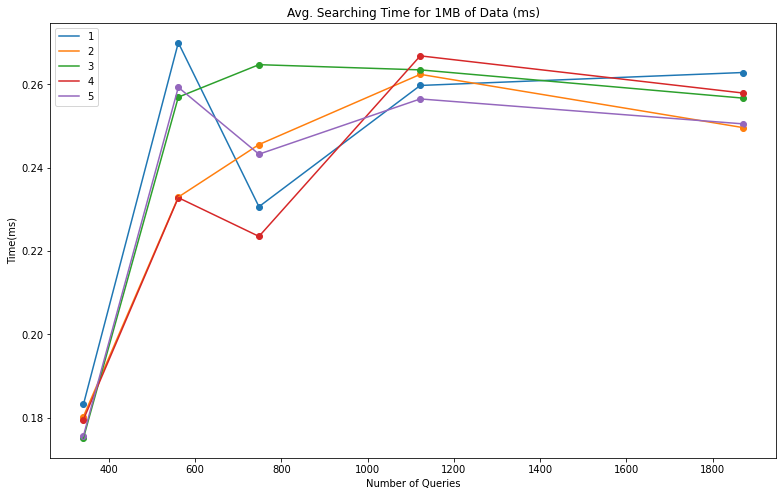

In [63]:
configs = [p0, p1, p2, p3, p4]

labels = [i for i in range(1, 8)]
data_sizes = [252410680 for _ in range(5)]
plot_exec_attr_time(configs, labels, data_sizes)

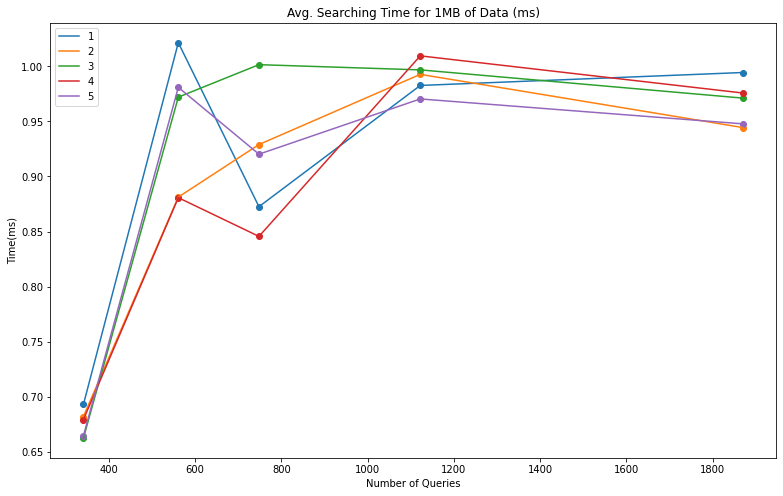

In [64]:
configs1 = [q0, q1, q2, q3, q4, q5]

data_sizes = [66716342 for _ in range(5)]
plot_exec_attr_time(configs, labels, data_sizes)

In [336]:
t0.exec_time.count()


341

In [337]:
q0.exec_time.count()

258

In [338]:
def avg_search_time_by_queries(frames, sizes, labels):

    lines = []
    avg_exec_times = []
    plt.figure(figsize=(10, 6))
    plt.ylabel("Time(ms)")
    plt.xlabel('Number of Queries run')    
    plt.title("Avg. Time for Traversing 1MB of Data (ms)")
    s = 0
    for fs in frames:
        i = 0
        avg_exec_time = []
        l =  []
        size = sizes[s]
        for f in fs:
            l.append(f.exec_time.count())
            avg_exec_time.append(f.exec_time.sum()/(f.exec_time.count()*(size[i]/2000000)))
            i += 1
        avg_exec_times.append(avg_exec_time)
        lines.append(l)
        s += 1
    i = 0        
    for l, a in zip(lines, avg_exec_times):
        plt.scatter(l, a, 70, label=labels[i])
        i += 1
    plt.legend(loc='lower right')

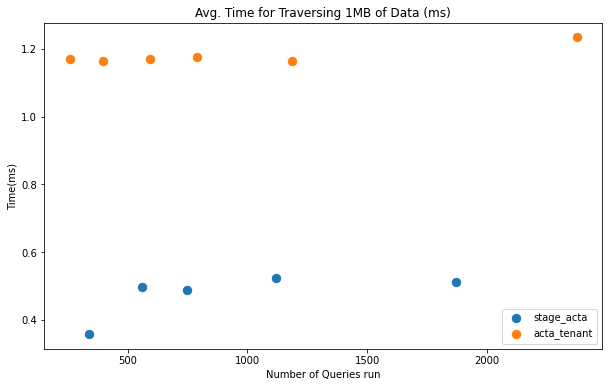

In [339]:
sizes = [[252410680 for _ in range(5)], [66716342 for _ in range(6)]]
avg_search_time_by_queries([configs, configs1], sizes, ['stage_acta', 'acta_tenant'])

# Average time for retrieveing one CaseNumber

In [85]:
def plot_ind_time(configs, labels):
    plt.figure(figsize=(13, 8))
    plt.ylabel("Time(ms)")
    plt.xlabel('Number of Filtering Attributes')    
    plt.title("Avg. Time for Retrieving one CaseNumber (ms)")
    i = 0
    for conf in configs:
        agg = conf.groupby(["nattr"]).sum()
        time = (agg.exec_time/agg.rows)
        plt.scatter(list(time.index), list(time))
        plt.plot(list(time.index), list(time), label = labels[i])
        i+=1
    
    plt.legend()

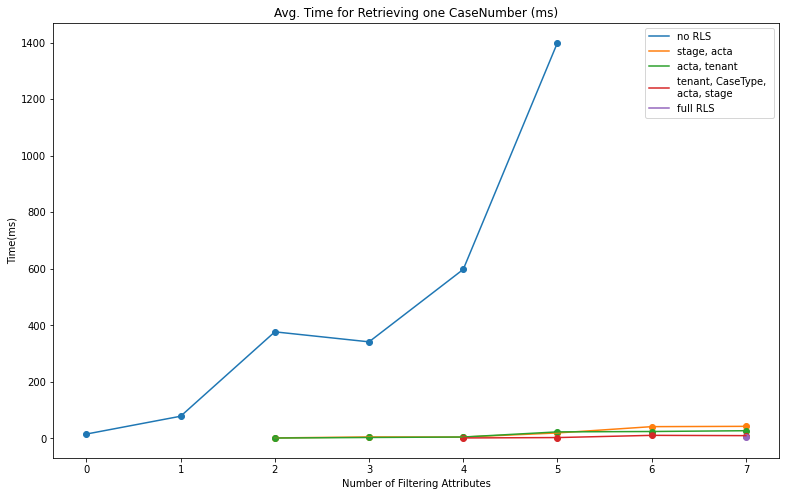

In [86]:
labels = ["no RLS", "stage, acta", "acta, tenant", "tenant, CaseType, \nacta, stage", "full RLS"]
frames = [no_rls, stage_acta, acta_tenant, ten_ct_acta_stage, full_rls]
plot_ind_time(frames, labels)

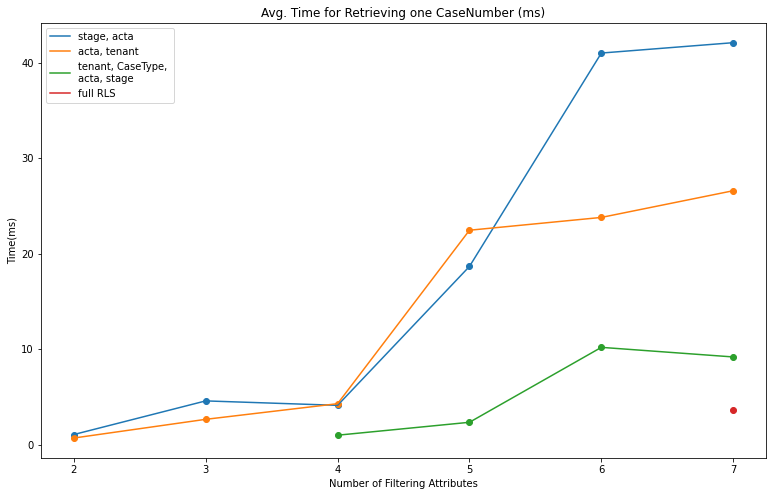

In [87]:
plot_ind_time(frames[1:], labels[1:])